In [74]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv('socialmobility.csv')

In [200]:
##df = pd.read_fwf('mobility.txt')
#df = df.drop(['Unnamed: 0'], axis=1)
df[:10]

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


In [66]:
print(df['fatherOccup'].value_counts())
print("")
print(df['sonOccup'].value_counts())


unskilled       16
skilled         16
farm            16
professional    15
Name: fatherOccup, dtype: int64

unskilled       16
professional    16
skilled         16
farm            15
Name: sonOccup, dtype: int64


In [175]:
'''
2. Choose a Dirichlet prior with a uniform distribution 
over the probability vector parameter of the multinomial.
'''

# father, son
# index: 0=farm, 1=unskilled, 2=skilled, 3=professional.
data_f = [16,16,16,15]
data_s = [15,16,16,16]

#adding uniform dir prior
posterior_f = [x+1 for x in data_f]
posterior_s = [x+1 for x in data_s]

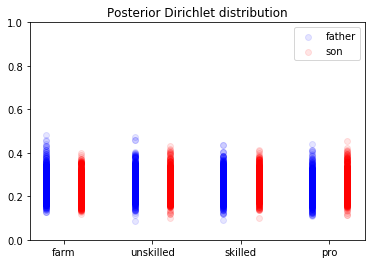

In [164]:
'''
 Write Python code to compute the posterior Dirichlet distribution, given your prior
hyperparameters and the data. Do not use Stan, but rather implement the update equations
from prior to posterior manually.
'''
samples_f = stats.dirichlet.rvs(posterior_f, size=1000).transpose()
samples_s = stats.dirichlet.rvs(posterior_s, size=1000).transpose()

for i in range(3):
    plt.scatter(np.full(1000, i-0.2),samples_f[i], alpha=0.1, color = "b")
    plt.scatter(np.full(1000, i+0.2),samples_s[i], alpha=0.1, color = "r")
plt.scatter(np.full(1000, 3-0.2),samples_f[3], alpha=0.1, color = "b", label = "father")
plt.scatter(np.full(1000, 3+0.2),samples_s[3], alpha=0.1, color = "r", label = "son")

plt.ylim([0,1])
plt.xticks([0,1,2,3],["farm","unskilled","skilled","pro"])
plt.legend()
plt.title("Posterior Dirichlet distribution")
plt.show()

In [197]:
'''What is the posterior 95% probability interval over the probability that a son will
become a skilled laborer if his father was an unskilled laborer?'''

#skilled son
print(np.mean(samples_s[2]))
skilled_s = samples_s[2]

#unskilled father 
print(np.mean(samples_f[1]))
unskilled_f = samples_f[1]

np.percentile(skilled_s * unskilled_f, [2.5, 97.5])


0.255753189026
0.25487034284


array([ 0.03294575,  0.1040623 ])

In [198]:
'''b. What is the posterior 95% probability interval over the probability that a father works
on a farm if his son works as a professional?'''

#farm father
print(np.mean(samples_f[0]))
farm_f = samples_f[0]

#prof son
print(np.mean(samples_s[3]))
prof_s = samples_s[3]

np.percentile(farm_f * prof_s, [2.5, 97.5])


0.255058140082
0.252682536768


array([ 0.03359854,  0.10801033])

In [201]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pystan

In [202]:
# Code the type of work with integers
farm = 0
unskilled = 1
skilled = 2
professional = 3

# Matrix of counts such that, for example, counts[farm][skilled] is the
# number of times a father does farm work and a son skilled work.
counts = [
    [703, 1478, 1430, 1109],
    [58, 1756, 1630, 1568],
    [63, 1453, 2068, 2483],
    [61, 749, 1183, 3315]]

In [203]:
stan_code = """

data {
    int<lower=1> C;    // number of categories in the multinomial
    vector[C] alpha;   // prior hyperparameters for Dirichlet
    int counts[C];     // the data set: counts for each category
}

parameters {
    simplex[C] theta;  // the probability vector over categories
}

model {

    // TO DO: Write the model block
    theta ~ dirichlet(alpha); // prior 
    counts ~ multinomial(theta); // likelihood

}
"""
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_68669dc6862c7387ab775ba69382541f NOW.
